# Estimation d'un modèle de facteur de risque pour une action

Dans ce projet nous allons utiliser des données financières en temps réels dans le but d'avoir les expositions factorielles et le risque spécifique d'un titre. Ici nous allons prendre la société Nestlé comme étude de cas et nous calculerons son rendement annuel attendu après avoir analyser les résultats de sa régression.

Pour collecter ces données, nous allons utiliser la librairie pandas_datareader puis yahoo finance pour obtenir celles de l'entreprise Nestlé.

Le modèle Fama-French est un modèle multifacteurs qui est utiliser pour estimer l'excès rendement d'un actif : c'est une extension du MEDAF. Il permet d'évaluer les performances d'investissements.

## Importation des librairies et collecte des données

In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

from statsmodels.api import OLS
import statsmodels.tools

Nous allons prendre les données dans la librairie 'famafrench', données provenants de Ken French, économiste américain. Elle contient les rendements des facteurs de risque communs.

In [4]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [5]:
#Nous allons choisir une date de départ
start = "1980-01-01"

## Création de nos dataframes et visualisation graphique

Nous allons utiliser pandas_dataread pour obtenir les 3 facteurs de famafrench depuis 1980 et créer une dataframe.

In [6]:
df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read() #fréquence mensuelle

In [7]:
df

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1980-01    5.51  1.62  1.75  0.80
 1980-02   -1.22 -1.85  0.61  0.89
 1980-03  -12.90 -6.64 -1.01  1.21
 1980-04    3.97  1.05  1.06  1.26
 1980-05    5.26  2.13  0.38  0.81
 ...         ...   ...   ...   ...
 2022-10    7.83  0.09  8.05  0.23
 2022-11    4.60 -3.40  1.38  0.29
 2022-12   -6.41 -0.68  1.32  0.33
 2023-01    6.65  5.02 -4.05  0.35
 2023-02   -2.58  1.10 -0.80  0.34
 
 [518 rows x 4 columns],
 1:       Mkt-RF    SMB    HML     RF
 Date                             
 1980   22.13   5.66 -24.61  11.24
 1981  -18.13   7.11  25.04  14.71
 1982   10.66   8.68  13.29  10.54
 1983   13.75  14.00  20.52   8.80
 1984   -6.05  -8.22  19.13   9.85
 1985   24.91   0.55   1.29   7.72
 1986   10.12  -9.55   9.34   6.16
 1987   -3.87 -10.95  -1.70   5.47
 1988   11.55   5.78  14.99   6.35
 1989   20.49 -12.86  -4.03   8.37
 1990  -13.95 -13.99 -10.03   7.81
 1991   29.18  16.08 -14.72   5.60
 1992    6.23   7.74  

Nous allons prendre la dataframe du rendemant pour avoir le rendement mensuelle des 3 facteurs

In [8]:
df1 = df[0]

Nous allons mettre notre dataframe sous forme de graphique pour évaluer la tendance en utilisant le module pyplot de matplotlib.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

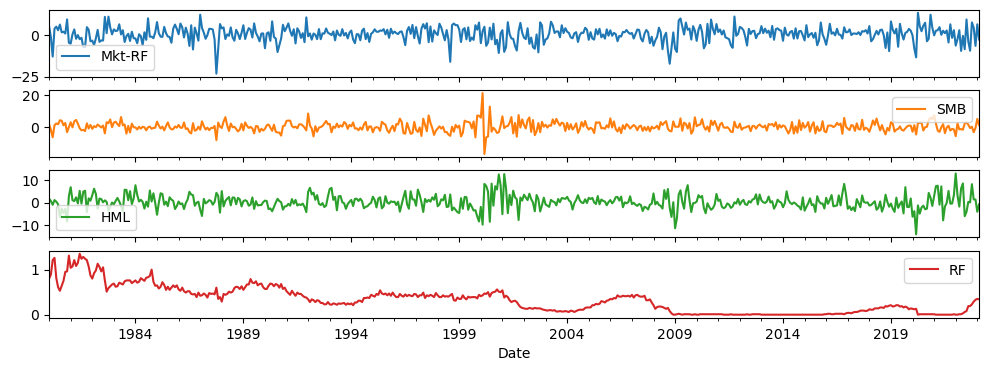

In [9]:
df1.plot(subplots=True, figsize=(12,4))

Nous allons lisser les données pour rendre le graphique plus simple à lire et à comprendre. On pourra ensuite avoir un meilleur visuel sur les facteurs dynamiques.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

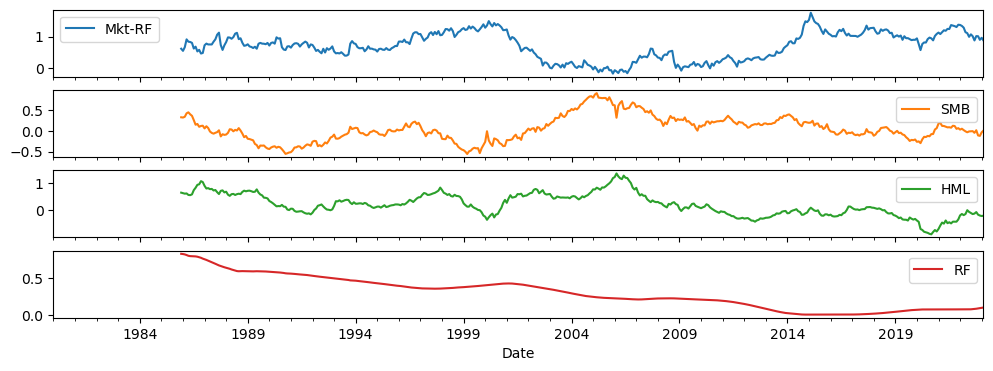

In [10]:
df1.rolling(72).mean().plot(subplots=True, figsize=(12,4))

On peut voir que le rendement de marché au-dessus du taux sans risque (MKT-RF) et le facteur de taille (SMB) ont une évolution contraire de 1999 à 2010. 
Nous allons ajouter à ça le facteur de mouvement.

In [11]:
df2 = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

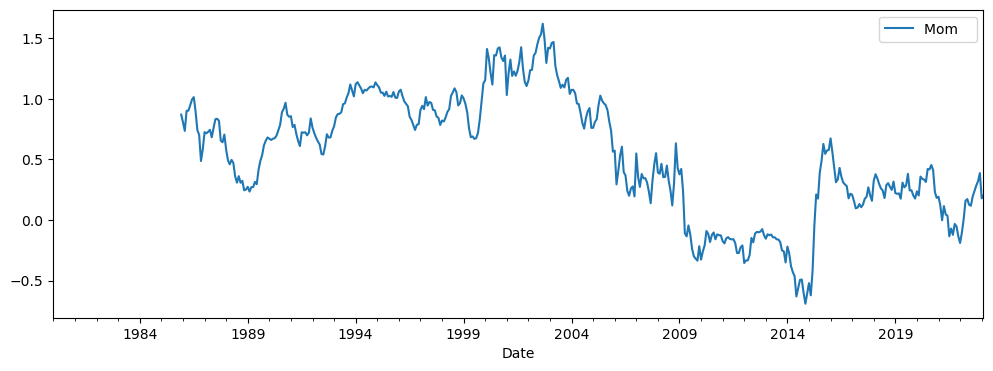

In [12]:
df2.rolling(72).mean().plot(subplots=True, figsize=(12,4))

## Fusion des dataframes

On a une seule série car nous avons seulement un facteur.
Or nous voulons combiner notre df1 et notre df2 pour pour avoir une df3 qui possède les 4 facteurs de risques en une seule dataframe. Nous allons utiliser pandas pour les fusionner.

In [13]:
df1

,Mkt-RF,SMB,HML,RF
Date,,,,
1980-01,5.51,1.62,1.75,0.80
1980-02,-1.22,-1.85,0.61,0.89
1980-03,-12.90,-6.64,-1.01,1.21
1980-04,3.97,1.05,1.06,1.26
1980-05,5.26,2.13,0.38,0.81
...,...,...,...,...
2022-10,7.83,0.09,8.05,0.23
2022-11,4.60,-3.40,1.38,0.29
2022-12,-6.41,-0.68,1.32,0.33


In [14]:
df2

,Mom
Date,
1980-01,7.55
1980-02,7.88
1980-03,-9.55
1980-04,-0.43
1980-05,-1.12
...,...
2022-10,3.87
2022-11,-2.01
2022-12,4.52


En analysant les deux dataframes, nous pouvons voir que la 'date' est un bon connecteur entre df1 et df2 ce qui permettra de fusionner les deux avec pd.merge(). 

In [15]:
df_fusion = pd.merge(df1, df2, on='Date', how='inner', sort=True, copy=True, indicator=False)

In [16]:
df_fusion

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1980-01,5.51,1.62,1.75,0.80,7.55
1980-02,-1.22,-1.85,0.61,0.89,7.88
1980-03,-12.90,-6.64,-1.01,1.21,-9.55
1980-04,3.97,1.05,1.06,1.26,-0.43
1980-05,5.26,2.13,0.38,0.81,-1.12
...,...,...,...,...,...
2022-10,7.83,0.09,8.05,0.23,3.87
2022-11,4.60,-3.40,1.38,0.29,-2.01
2022-12,-6.41,-0.68,1.32,0.33,4.52


Nous pouvons voir que la fusion a fonctionné : nous avons alors nos 3 facteurs de risques et le taux sans risque Rf. 

## Cas Nestlé : obtention des données d'un actif risqué pour le modèle famafrench

#### Nous allons maintenant voir comment obtenir les données de l'actif risqué que nous voulons régresser sur ces facteurs de risque.

Nous allons prendre une entreprise comme exemple, qui nous servira d'actif risqué. Nous choisirons l'entreprise Nestlé, et nous utiliserons yahoo finance pour obtenir les données de la société.

In [17]:
#téléchargement des données de nestlé avec yahoo finance

NESTLE_data = yf.download('NESN.SW', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


Nous avons pris les données de Nestlé à partir de la date de début qu'on a choisis au début. Par la suite nous choisissons de prendre le prix de clôture ajusté (par rapport à la distribution de dividendes), et de voir les données mensuelles.

In [18]:
NESTLE_data

Date
1990-02-28         NaN
1990-03-31   -0.005313
1990-04-30    0.005935
1990-05-31   -0.002950
1990-06-30    0.044379
                ...   
2022-12-31   -0.046288
2023-01-31    0.040508
2023-02-28   -0.048439
2023-03-31    0.050716
2023-04-30    0.020276
Freq: M, Name: Adj Close, Length: 399, dtype: float64

Nous mettons nos données dans une dataframe :

In [19]:
NESTLE_df = NESTLE_data.to_frame()

In [20]:
NESTLE_df

,Adj Close
Date,
1990-02-28,NaN
1990-03-31,-0.005313
1990-04-30,0.005935
1990-05-31,-0.002950
1990-06-30,0.044379
...,...
2022-12-31,-0.046288
2023-01-31,0.040508
2023-02-28,-0.048439


## Fusion de nos dataframes (celle de Nestlé et notre ancienne dataframe fusionnée)

Nous voulons maintenant fusionner nos deux dataframe (NESTLE_df et df_fusion) pour rendre l'analyse plus simple et lisible. Dans un premier nous devons vérifier leur type car si elles ont un type différent, alors on ne pourra pas les fusionner directement.

In [21]:
NESTLE_df.index.dtype #timestamp

dtype('<M8[ns]')

In [22]:
df_fusion.index.dtype #période

period[M]

Nous devons alors changer les index des deux données, et les ré-indexer pour leur donner un indexe qui est mutuellement comparable.

In [23]:
# création d'une valeure intermédiaire
NESTLE_df['str_date'] = NESTLE_df.index.astype(str)
NESTLE_df['dt_date'] = pd.to_datetime(NESTLE_df['str_date']).dt.strftime('%Y-%m') 
# création d'une nouvelle colonne qui sera une version 'date' du string : on aura une date composée seulement de l'année et du mois

In [24]:
# On fait la même chose pour notre autre dataframe pour que les deux aient un format similaire
df_fusion['str_date'] = df_fusion.index.astype(str)
df_fusion['dt_date'] = pd.to_datetime(df_fusion['str_date']).dt.strftime('%Y-%m') 

Nous allons maintenant vérifier que les deux dataframes ont le même type pour pouvoir effectuer la fusion. 

In [25]:
NESTLE_df.dt_date.dtype

dtype('O')

In [26]:
df_fusion.dt_date.dtype

dtype('O')

Nous allons maintenant effectuer la fusion :

In [27]:
NESTLE_df_fusion = pd.merge(NESTLE_df,df_fusion, how='inner', on='dt_date', sort=True, copy=True, indicator=False)

In [28]:
NESTLE_df_fusion # dataframe actualisé avec les modifications en dessous (inplace=True)

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1990-02-28,1990-02,1.11,0.99,0.64,0.57,-0.55,1990-02
1,-0.005313,1990-03-31,1990-03,1.83,1.50,-2.92,0.64,1.80,1990-03
2,0.005935,1990-04-30,1990-04,-3.36,-0.46,-2.59,0.69,2.39,1990-04
3,-0.002950,1990-05-31,1990-05,8.42,-2.53,-3.83,0.68,3.03,1990-05
4,0.044379,1990-06-30,1990-06,-1.09,1.40,-1.93,0.63,2.40,1990-06
...,...,...,...,...,...,...,...,...,...
392,0.018304,2022-10-31,2022-10,7.83,0.09,8.05,0.23,3.87,2022-10
393,0.030264,2022-11-30,2022-11,4.60,-3.40,1.38,0.29,-2.01,2022-11
394,-0.046288,2022-12-31,2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12
395,0.040508,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.96,2023-01


## Nettoyage des données : cleaning 

Nous avons fusionné nos deux dataframe, nous allons maintenant nettoyer nos données : retirer les colonnes inutiles, renommer les titres si nécessaires et se supprimer les données vides.

Les changements ci-dessous sont directement appliqué à notre dataframe grâce à "inplace=True".

In [29]:
NESTLE_df_fusion.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [30]:
NESTLE_df_fusion.rename(columns={'Adj Close' : 'NESTLE'}, inplace=True)

In [31]:
NESTLE_df_fusion.rename(columns={'Mom   ' : 'Mom'}, inplace=True)

In [32]:
# création d'une nouvelle colonne
NESTLE_df_fusion['NESTLE_RF'] = NESTLE_df_fusion['NESTLE']*100-NESTLE_df_fusion['RF']

In [33]:
#Suppression des lignes ayant des données manquantes
NESTLE_df_fusion.dropna(axis=0, inplace=True)

#### Nous possédons maintenant nos données qui ont été néttoyées et regroupées. Nous pouvons maintenant passer à la suite du projet.

## Régréssion des rendements d'un actif risqué sur un model factoriel à multiples facteurs de risque

Procéder à une régression linéaire du portefeuille d'action de Nestlé va nous permettre d'identifier les variables explicatives, de comprendre la relation entre les variables indépendantes et explicatives pour prévoir les valeurs inconnues.

Nous allons utiliser la fonction 'OLS' pour construire un modèle linéaire en utilisant les valeurs x et y. Puis nous regarderons le résumé des résultats.

In [34]:
resultats = OLS(NESTLE_df_fusion['NESTLE_RF'], NESTLE_df_fusion[['Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()

In [35]:
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              NESTLE_RF   R-squared (uncentered):                   0.071
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              7.449
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                    8.62e-06
Time:                        18:46:59   Log-Likelihood:                         -1140.3
No. Observations:                 396   AIC:                                      2289.
Df Residuals:                     392   BIC:                                      2304.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.2835      0.052      5.416      0.000       0.181       0.386
SMB           -0.0510      0.073     -0.702      0.483      -0.194       0.092
HML            0.0820      0.071      1.162      0.246      -0.057       0.221
Mom            0.0924      0.049      1.896      0.059      -0.003       0.188
==============================================================================
Omnibus:                      173.157   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2006.255
Skew:                           1.525   Prob(JB):                         0.00
Kurtosis:                      13.597   Cond. No.                         1.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous pouvons remarquer que nous n'avons pas de constante alpha (valeur de y si x est 0). Nous allons l'ajouter par nous même grâce au module statsmodels.

In [36]:
NESTLE_df_fusion_constante = statsmodels.tools.add_constant(NESTLE_df_fusion, prepend=True)

In [37]:
NESTLE_df_fusion_constante

,const,NESTLE,dt_date,Mkt-RF,SMB,HML,RF,Mom,NESTLE_RF
1,1.0,-0.005313,1990-03,1.83,1.50,-2.92,0.64,1.80,-1.171281
2,1.0,0.005935,1990-04,-3.36,-0.46,-2.59,0.69,2.39,-0.096522
3,1.0,-0.002950,1990-05,8.42,-2.53,-3.83,0.68,3.03,-0.974998
4,1.0,0.044379,1990-06,-1.09,1.40,-1.93,0.63,2.40,3.807888
5,1.0,0.000000,1990-07,-1.90,-3.12,-0.03,0.68,6.10,-0.680000
...,...,...,...,...,...,...,...,...,...
392,1.0,0.018304,2022-10,7.83,0.09,8.05,0.23,3.87,1.600406
393,1.0,0.030264,2022-11,4.60,-3.40,1.38,0.29,-2.01,2.736408
394,1.0,-0.046288,2022-12,-6.41,-0.68,1.32,0.33,4.52,-4.958803
395,1.0,0.040508,2023-01,6.65,5.02,-4.05,0.35,-15.96,3.700778


Nous pouvons voir que la première colonne est notre constante composée uniquement de 1, ce qui est nécessaire pour faire tourner notre régression avec une constante.

In [38]:
# On ajoute la constante
resultats = OLS(NESTLE_df_fusion_constante['NESTLE_RF'], NESTLE_df_fusion_constante[['const', 'Mkt-RF', 'SMB', 'HML', 'Mom']], missing='drop').fit()
resultats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NESTLE_RF   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.109
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           8.91e-05
Time:                        18:47:02   Log-Likelihood:                -1138.2
No. Observations:                 396   AIC:                             2286.
Df Residuals:                     391   BIC:                             2306.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4514      0.223      2.023      0.044       0.013       0.890
Mkt-RF         0.2621      0.053      4.926      0.000       0.157       0.367
SMB           -0.0525      0.072     -0.724      0.469      -0.195       0.090
HML            0.0670      0.071      0.949      0.343      -0.072       0.206
Mom            0.0757      0.049      1.536      0.125      -0.021       0.173
==============================================================================
Omnibus:                      174.183   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2027.718
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      13.652   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous pouvons voir que nous avons maintenant un alpha. 

## Analyse des résultats

De plus nous observons que l'alpha de Nestlé est positif et assez significatif de 0,45% par mois. 

Nous utilisons les coefficients de Mkt-RF, SMB et HML en tant que valeur de beta 1 (0.2621), beta 2 (-0.0525) et beta 3 (0.0670). Nous pouvons voir que le SMB peut être moins significatif car la p value est légèrement sous 0.05. Cela pourrait signifier que l'excès de rendement de petites capitalisations par rapoort aux grosses capitalisations pourrait ne pas être un facteur critique. Alors l'action est moins volatile que le marché. On peut prédire que l'action a un risque plus faible mais aussi un rendement plus faible. 


Le 5,9% (R-squared) de la variabilité des rendements de Nestlé nous suggeste qu'il y a un léger composant particulier.

Les effets de SMB et de la détresse relative (HLM) de l’entreprise peuvent ne pas être des facteurs de risques spécifiques mais la réaction excessive des investisseurs.

### Calcul du rendement attendu annuel :

Nous voyons que le taux sans risque (rf), l'excès de rendement sur le marché (Mkt-RF), SMB et HML sont différents d'un mois à un autre. Nous pouvons alors faire la moyenne pour estimer le rendement attendu de l'action sur la base du modèle Fama-French.

Nous créeons une classe possedant deux définitions (Calcul et Resultat) qui nous permettra de calculer notre rendement attendu annuel.

In [68]:
class RendementAttendu:
    "Le rendement annuel attendu pour l'entreprise Nestlé est :"
    
    def Calcul():
        b1= 0.2621
        b2= -0.525
        b3= 0.067
        rf = NESTLE_df_fusion_constante['RF'].mean()
        market_premium = NESTLE_df_fusion_constante['Mkt-RF'].mean()
        size_premium = NESTLE_df_fusion_constante['SMB'].mean()
        value_premium = NESTLE_df_fusion_constante['HML'].mean()
        
        rend_att_mensuel = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
        rend_att_annuel = rend_att_mensuel * 12
        print(str(rend_att_annuel))
    
    def Resultat():
        print(RendementAttendu.__doc__)
    
    Resultat()
    Calcul(), print('%')

Le rendement annuel attendu pour l'entreprise Nestlé est :
4.092366878787878
%


Le résultat nous montre que le rendement annuel attendu est de 4.09% avec le model Fama French.

In [45]:
#Premier beta
p1=RendementAttendu()
print(p1.b1)

0.2621


In [46]:
#second beta
p2=RendementAttendu()
print(p2.b2)

-0.525


In [115]:
#troisième beta
p3=RendementAttendu()
print(p3.b3)

0.067
